    機器學習-斜拋射原理 (以擲鉛球為案例)

In [1]:
# 參數
# 常數-1 : 離手高度 (ho) ; 設定在 : 2 (m)
# 常數-2 : 重力加速度(g) ; 設定在 : 9.8 (m/s^2)
# 變數-1 : 初速度（v0） ; 設定在 : 9 ~ 14 (m/s)
# 變數-2 : 角度（Theta）; 設定在 : 35 ~ 55 (deg)
# 結果-1 : 距離（R）; 理論值範圍落在 : 8 ~ 25 (m)
# 結果-2 : 高度（H）; 理論值範圍落在 : 3 ~ 9 (m)

# 距離公式 (拋射總距離)
# Ra = (v0**2) * np.sin(Theta*np.pi/180 *2) / g (拋射離手高度至落下到離手高度的距離)
# Rb = 2 / np.tan(Theta*np.pi/180) (離手高度至落地的距離)
# R = Ra + Rb

# 高度公式 (拋射曲線-最高高度)
# ho = 2
# h1 = ( v0*math.sin(Theta*math.pi/180) )**2 / (2*g)
# H = ho + h1

In [2]:
%matplotlib inline
import tensorflow as tf
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D

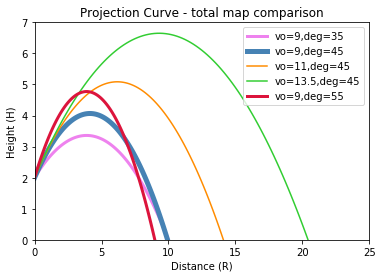

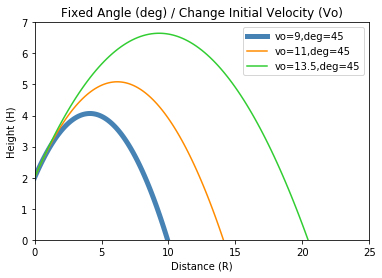

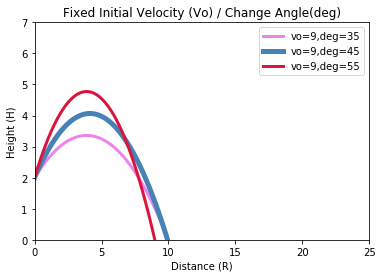

In [3]:
# 直接代公式_計算拋射原理曲線 (推算擲鉛球運動)
ho=2
g=9.8
#Ra = (vo**2) * math.sin(deg*math.pi/180 *2) / g
#Rb = 2 / math.tan(deg*math.pi/180)
#R=Ra+Rb
#H = ( vo*math.sin(deg*math.pi/180) )**2 / (2*g) + 2
# 角度為45度+-10度
# 速度為11.5+-2.5
def length( vo ,deg ):
    Ra = (vo**2) * math.sin(deg*math.pi/180 *2) / 9.8
    Rb = 2 / math.tan(deg*math.pi/180)
    R =Ra+Rb
    return (R)

def high( vo ,deg ):
    h = ( vo*math.sin(deg*math.pi/180) )**2 / (2*g) + 2
    return (h)

def times( R,vo,deg ):
    t = R/vo/math.cos(deg*math.pi/180)
    return ( np.linspace(0, t, 100) )

def high_t(vo,deg,t):
    return ( vo*math.sin(deg*math.pi/180)*t - t**2*9.8/2 + 2 )

t1_data = times( length(9,35),9,35 )
x1_data = t1_data*9*math.cos(35*math.pi/180)
t2_data = times( length(9,45),9,45 )
x2_data = t2_data*9*math.cos(45*math.pi/180)
t3_data = times( length(11,45),11,45 )
x3_data = t3_data*11*math.cos(45*math.pi/180)
t4_data = times( length(13.5,45),13.5,45 )
x4_data = t4_data*13.5*math.cos(45*math.pi/180)
t5_data = times( length(9,55),9,55 )
x5_data = t5_data*9*math.cos(55*math.pi/180)

plt.plot( x1_data,  high_t(9,35,t1_data), color='#EE82EE', label='vo=9,deg=35', lw=3 )
plt.plot( x2_data,  high_t(9,45,t2_data), color='#4682B4', label='vo=9,deg=45', lw=5 )
plt.plot( x3_data,  high_t(11,45,t3_data), color='#FF8C00', label='vo=11,deg=45' )
plt.plot( x4_data,  high_t(13.5,45,t4_data), color='#32CD32', label='vo=13.5,deg=45' )
plt.plot( x5_data,  high_t(9,55,t5_data), color='#DC143C', label='vo=9,deg=55', lw=3  )
plt.legend()
plt.xlim((0,25))
plt.ylim((0,7))
plt.title('Projection Curve - total map comparison')
plt.xlabel('Distance (R)')
plt.ylabel('Height (H)')
plt.show()

t2_data = times( length(9,45),9,45 )
x2_data = t2_data*9*math.cos(45*math.pi/180)
t3_data = times( length(11,45),11,45 )
x3_data = t3_data*11*math.cos(45*math.pi/180)
t4_data = times( length(13.5,45),13.5,45 )
x4_data = t4_data*13.5*math.cos(45*math.pi/180)

plt.plot( x2_data,  high_t(9,45,t2_data), color='#4682B4', label='vo=9,deg=45', lw=5 )
plt.plot( x3_data,  high_t(11,45,t3_data), color='#FF8C00', label='vo=11,deg=45' )
plt.plot( x4_data,  high_t(13.5,45,t4_data), color='#32CD32', label='vo=13.5,deg=45' )
plt.legend()
plt.xlim((0,25))
plt.ylim((0,7))
plt.title('Fixed Angle (deg) / Change Initial Velocity (Vo)')
plt.xlabel('Distance (R)')
plt.ylabel('Height (H)')
plt.show()

t1_data = times( length(9,35),9,35 )
x1_data = t1_data*9*math.cos(35*math.pi/180)
t2_data = times( length(9,45),9,45 )
x2_data = t2_data*9*math.cos(45*math.pi/180)
t5_data = times( length(9,55),9,55 )
x5_data = t5_data*9*math.cos(55*math.pi/180)

plt.plot( x1_data,  high_t(9,35,t1_data), color='#EE82EE', label='vo=9,deg=35', lw=3 )
plt.plot( x2_data,  high_t(9,45,t2_data), color='#4682B4', label='vo=9,deg=45', lw=5 )
plt.plot( x5_data,  high_t(9,55,t5_data), color='#DC143C', label='vo=9,deg=55', lw=3 )
plt.legend()
plt.xlim((0,25))
plt.ylim((0,7))
plt.title('Fixed Initial Velocity (Vo) / Change Angle(deg)')
plt.xlabel('Distance (R)')
plt.ylabel('Height (H)')
plt.show()

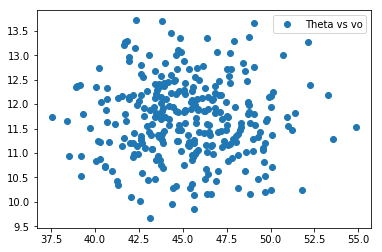

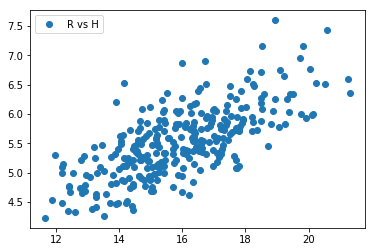

In [4]:
number_of_points = 300
Theta_point=[]
vo_point=[]
R_point=[]
H_point=[]

for i in range(number_of_points):
    Theta = 45 + np.random.normal(0.1, 3.1)
    vo = 11.5 + np.random.normal(0.2, 0.8)
    Theta_point.append([Theta])
    vo_point.append([vo])
    R = (vo**2)*math.sin(Theta*math.pi/180*2)/g + 2/math.tan(Theta*math.pi/180)
    H = ( vo*math.sin(Theta*math.pi/180) )**2 / (2*g) + 2
    R_point.append([R])
    H_point.append([H])

#plt.plot( R_point, H_point , 'o', label='R vs H' )
plt.plot( Theta_point, vo_point , 'o', label='Theta vs vo' )
plt.legend()
plt.show()

plt.plot( R_point, H_point , 'o', label='R vs H' )
plt.legend()
plt.show()

In [5]:
print( "Max R : ", max(R_point) )
print( "Max H : ", max(H_point) )

Max R :  [21.30693517739727]
Max H :  [7.595034114433853]


In [6]:
XYZ_Edges = pd.read_csv('20190409-hw3-data\Edges.csv')
XYZ_Edges

,Vo,Theta,g(m/s^2),ho(m),R(m),H(m)
0,9.0,35.0,9.8,2,10.62,3.36
1,9.1,35.0,9.8,2,10.80,3.39
2,9.2,35.0,9.8,2,10.97,3.42
3,9.3,35.0,9.8,2,11.15,3.45
4,9.4,35.0,9.8,2,11.33,3.48
5,9.5,35.0,9.8,2,11.51,3.51
6,9.6,35.0,9.8,2,11.69,3.55
7,9.7,35.0,9.8,2,11.88,3.58
8,9.8,35.0,9.8,2,12.07,3.61
9,9.9,35.0,9.8,2,12.25,3.65


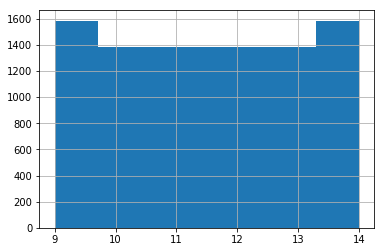

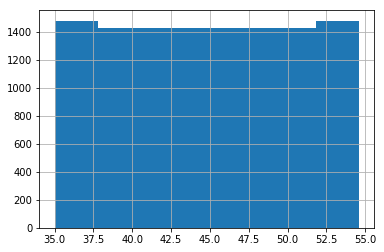

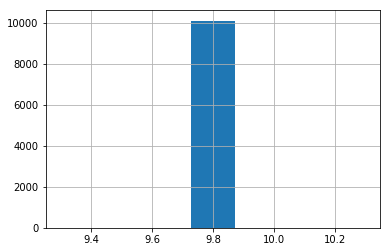

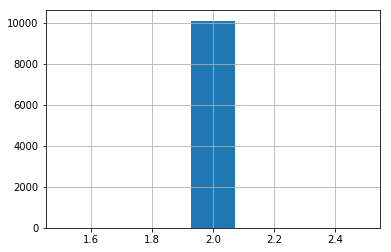

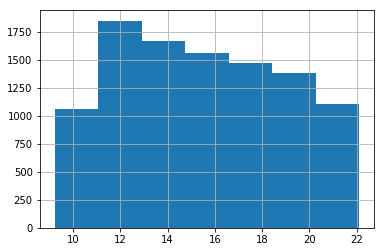

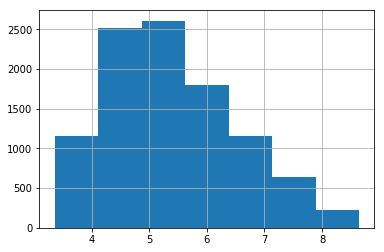

In [7]:
for item in XYZ_Edges.columns:
    #print(item,type(item))
    XYZ_Edges[item].hist(bins = 7)
    plt.show()    

In [8]:
XYZ_E = np.array(XYZ_Edges.iloc[:, 0:6].values)
XYZ_E

array([[ 9.  , 35.  ,  9.8 ,  2.  , 10.62,  3.36],
       [ 9.1 , 35.  ,  9.8 ,  2.  , 10.8 ,  3.39],
       [ 9.2 , 35.  ,  9.8 ,  2.  , 10.97,  3.42],
       ...,
       [13.8 , 54.6 ,  9.8 ,  2.  , 19.77,  8.46],
       [13.9 , 54.6 ,  9.8 ,  2.  , 20.04,  8.55],
       [14.  , 54.6 ,  9.8 ,  2.  , 20.31,  8.64]])

In [9]:
print( " MAX_R: ", max(R_point) )
print( " MAX_H : ", max(H_point) )

 MAX_R:  [21.30693517739727]
 MAX_H :  [7.595034114433853]


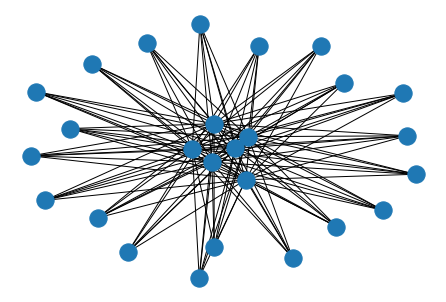

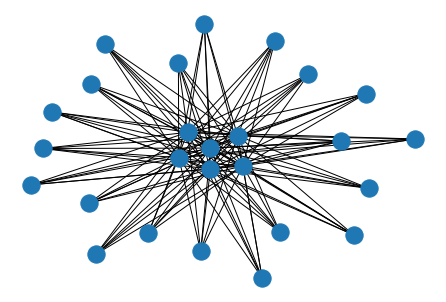

In [10]:
#Use the following command to install required package.
#conda install python-louvain networkx
#https://python-louvain.readthedocs.io/en/latest/index.html
#https://networkx.github.io/documentation/stable/index.html
import community
import networkx as nx
import matplotlib.pyplot as plt

#Use pre-defined linkage (Edges.csv) to constructure whole network
G = nx.Graph()
for i in range(0, len(XYZ_E)):    
    e = ( str(int(XYZ_E[i,0])), str(int(XYZ_E[i,1])), XYZ_E[i,4] )
    G.add_weighted_edges_from([(e)])
nx.draw(G)                          #繪製網路G
plt.savefig("ba.png")               #輸出方式 1: 將圖像存為一個png格式的圖片文件
plt.show()                          #輸出方式 2: 在視窗中顯示

#Use pre-defined linkage (Edges.csv) to constructure whole network
G = nx.Graph()
for i in range(0, len(XYZ_E)):    
    e = ( str(int(XYZ_E[i,0])), str(int(XYZ_E[i,1])), XYZ_E[i,5] )
    G.add_weighted_edges_from([(e)])
nx.draw(G)                          #繪製網路G
plt.savefig("ba.png")               #輸出方式 1: 將圖像存為一個png格式的圖片文件
plt.show()                          #輸出方式 2: 在視窗中顯示

In [11]:
partition = community.best_partition(G)
size = float(len(set(partition.values())))
print("community:", size)
mod = community.modularity(partition,G)
print("modularity:", mod)

community: 2.0
modularity: 0.0008706005293935559


Community 0
['9', '35', '10', '11', '36', '37', '41', '43', '44', '50', '51', '52']
Community 1
['12', '13', '14', '38', '39', '40', '42', '45', '46', '47', '48', '49', '53', '54']


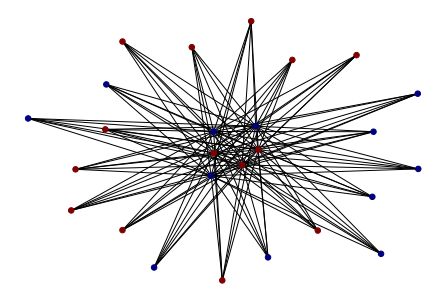

In [12]:
#assign node color based on community in network
for com in set(partition.values()) :
    print("Community", com)
    members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    print(members)
values = [partition.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size = 30, with_labels = False)
plt.show()

In [13]:
number_pts = 100000

# 常數
h0=2
g=9.8
# 變數
v0=[]
Theta=[]
R=[]
H=[]

for i in range(number_pts):
    v0_tmp = 11.5 + np.random.normal(0.1, 0.8)
    Theta_tmp = 45 + np.random.normal(0.5, 3.1)
    Theta.append(Theta_tmp)
    v0.append(v0_tmp)
    R_tmp = (v0_tmp**2)*math.sin(Theta_tmp*math.pi/180*2)/g + 2/math.tan(Theta_tmp*math.pi/180)
    H_tmp = ( v0_tmp*math.sin(Theta_tmp*math.pi/180) )**2 / (2*g) + h0
    R.append(R_tmp)
    H.append(H_tmp)

#將數據重新reshaape
v0=np.reshape(v0,(number_pts,-1))
Theta=np.reshape(Theta,(number_pts,-1))
R=np.reshape(R,(number_pts,-1))
H=np.reshape(H,(number_pts,-1))
#將數據append一起
data_1=np.append(v0,Theta, axis=1)
data_1=np.append(data_1,R, axis=1)
data_1=np.append(data_1,H, axis=1)
print(" Velocity(v0)    Theta     Range(R)     Height(H)")
print(data_1)

 Velocity(v0)    Theta     Range(R)     Height(H)
[[10.84550438 46.15179183 13.91401196  5.12124533]
 [11.46973309 51.29649904 14.70352507  6.08767533]
 [12.17962669 44.70449304 17.1570042   5.74523346]
 ...
 [12.04511365 44.66531273 16.82706045  5.65790323]
 [11.76348281 39.96832238 16.28930538  4.91325255]
 [11.60144189 43.77403853 15.80892528  5.2866174 ]]


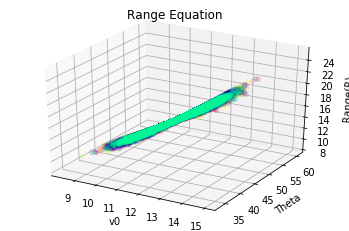

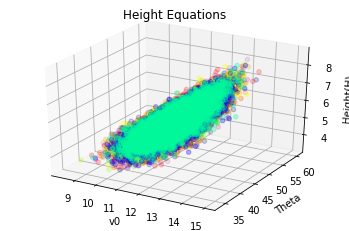

In [14]:
# 將random數據分成十種顏色繪製
fig1 = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(v0[:10000], Theta[:10000], R[:10000], color='#FF0000',alpha=0.1)  # 繪製數據點
ax.scatter(v0[10000:20000], Theta[10000:20000], R[10000:20000], color='#FF1493',alpha=0.1)
ax.scatter(v0[20000:30000], Theta[20000:30000], R[20000:30000], color='#FF8C00',alpha=0.1)
ax.scatter(v0[30000:40000], Theta[30000:40000], R[30000:40000], color='#DAA520',alpha=0.1)
ax.scatter(v0[40000:50000], Theta[40000:50000], R[40000:50000], color='#FFFF00',alpha=0.2)
ax.scatter(v0[50000:60000], Theta[50000:60000], R[50000:60000], color='#ADFF2F',alpha=0.2)
ax.scatter(v0[60000:70000], Theta[60000:70000], R[60000:70000], color='#00FA9A',alpha=0.2)
ax.scatter(v0[70000:80000], Theta[70000:80000], R[70000:80000], color='#0000FF',alpha=0.2)
ax.scatter(v0[80000:90000], Theta[80000:90000], R[80000:90000], color='#00008B',alpha=0.15)
ax.scatter(v0[90000:100000], Theta[90000:100000], R[90000:100000], color='#800080',alpha=0.1)
plt.title('Range Equation')
ax.set_zlabel('Range(R)')  #坐標軸
ax.set_ylabel('Theta')
ax.set_xlabel('v0')
plt.savefig('MaxRdata.png',dpi=150)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(v0[:10000], Theta[:10000], H[:10000], color='#FF0000',alpha=0.2)  # 繪製數據點
ax.scatter(v0[10000:20000], Theta[10000:20000], H[10000:20000], color='#FF1493',alpha=0.2)
ax.scatter(v0[20000:30000], Theta[20000:30000], H[20000:30000], color='#FF8C00',alpha=0.2)
ax.scatter(v0[30000:40000], Theta[30000:40000], H[30000:40000], color='#DAA520',alpha=0.2)
ax.scatter(v0[40000:50000], Theta[40000:50000], H[40000:50000], color='#FFFF00',alpha=0.3)
ax.scatter(v0[50000:60000], Theta[50000:60000], H[50000:60000], color='#ADFF2F',alpha=0.3)
ax.scatter(v0[60000:70000], Theta[60000:70000], H[60000:70000], color='#00FA9A',alpha=0.3)
ax.scatter(v0[70000:80000], Theta[70000:80000], H[70000:80000], color='#0000FF',alpha=0.3)
ax.scatter(v0[80000:90000], Theta[80000:90000], H[80000:90000], color='#00008B',alpha=0.2)
ax.scatter(v0[90000:100000], Theta[90000:100000], H[90000:100000], color='#800080',alpha=0.1)
plt.title('Height Equations')
ax.set_zlabel('Height(H)')  #坐標軸
ax.set_ylabel('Theta')
ax.set_xlabel('v0')
plt.savefig('MaxRdata.png',dpi=150)

In [15]:
X = data_1[:,:2]
Y = data_1[:,2:4]

traindata=0.9*number_pts # 取資料點當中前 90% 筆資料當作 training data
testdata=0.1*number_pts # 取資料點當中，後 10% 筆資料當作 testing data

# 建立 trainig 與 testing data
X_train, Y_train = X[:int(traindata)], Y[:int(traindata)]
X_test, Y_test = X[int(traindata):], Y[int(traindata):]

#建模
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_dim=2,kernel_initializer='normal', activation=tf.nn.relu,name='Input_Layer'),
    tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True,name='BN_Layer1'),
    tf.keras.layers.Dense(64, activation=tf.nn.relu,name='hidden_Layer2'),
    tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=False,name='BN_Layer2'),
    tf.keras.layers.Dense(64, activation=tf.nn.relu,name='hidden_Layer3'),
    tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True,name='BN_Layer3'),
    tf.keras.layers.Dense(32, activation=tf.nn.relu,name='hidden_Layer4'),
    tf.keras.layers.Dense(2,name='output_Layer')])

model.compile(optimizer='adam',loss='msle',metrics=['accuracy'])             
 
print( "Training ------------")
# Another way to train the model
#model.fit(X_train, Y_train, epochs=40, batch_size=32, validation_split=0.3,callbacks=[kerasboard])
model.fit(X_train, Y_train, epochs=40, batch_size=32, validation_split=0.3)

print( "\nTesting ------------")
# Evaluate the model with the metrics we defined earlier
score = model.evaluate(X_test, Y_test, verbose=0)

## loss, accuracy = model.evaluate(X_test, Y_test)

print( "test loss: {}".format(score[0])) #loss
print( "test accuracy: {}".format(score[1])) #accuracy

Instructions for updating:
Colocations handled automatically by placer.
Training ------------
Train on 62999 samples, validate on 27001 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
62999/62999 [==============================] - 12s 196us/sample - loss: 0.0833 - acc: 0.9871 - val_loss: 0.0118 - val_acc: 1.0000
Epoch 2/40
62999/62999 [==============================] - 11s 167us/sample - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 3/40
62999/62999 [==============================] - 10s 158us/sample - loss: 0.0012 - acc: 1.0000 - val_loss: 0.3586 - val_acc: 1.0000
Epoch 4/40
62999/62999 [==============================] - 10s 164us/sample - loss: 9.7918e-04 - acc: 1.0000 - val_loss: 0.0322 - val_acc: 1.0000
Epoch 5/40
62999/62999 [==============================] - 12s 186us/sample - loss: 8.0937e-04 - acc: 1.0000 - val_loss: 0.0148 - val_acc: 1.0000
Epoch 6/40
62999/62999 [==============================] - 12s 183us/sample - loss: 7.4253e-04 -

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 32)                96        
_________________________________________________________________
BN_Layer1 (BatchNormalizatio (None, 32)                128       
_________________________________________________________________
hidden_Layer2 (Dense)        (None, 64)                2112      
_________________________________________________________________
BN_Layer2 (BatchNormalizatio (None, 64)                192       
_________________________________________________________________
hidden_Layer3 (Dense)        (None, 64)                4160      
_________________________________________________________________
BN_Layer3 (BatchNormalizatio (None, 64)                256       
_________________________________________________________________
hidden_Layer4 (Dense)        (None, 32)                2080      
__________